# Import Libraries
- Put all the important libraries together at the beginning to improve the readability, performance, and maintainability of the code

In [1]:
import pandas as pd # data processing, like pd.read_csv()
import numpy as np # linear algebra
import warnings# to make all the coding result more readable, ignnore the warning information
warnings.filterwarnings('ignore')
#import matplot and seaborn to draw the figures
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import tensorflow as tf # use tensorflow to build neuron network

# Get the Data

In [2]:
from pathlib import Path
df=pd.read_csv(Path('SpamDataset.csv'))# use .read_csv() method to get the whole data

# EDA: Exploratory Data Analysis

## Dataset Dimensions

In [ ]:
df.shape # check the dataset, there are 4600 instances and 58 attributes

(4600, 58)

## Preview the dataset

In [ ]:
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.000,0.897,1.157,0.0,0.127,0.000,0.000,0.127,0.257,0.127,...,0.0,0.192,0.0,0.377,0.068,0.000,2.885,87,478,1
1,0.893,0.000,0.000,0.0,0.000,0.000,0.893,0.000,0.000,0.000,...,0.0,0.000,0.0,0.557,0.000,0.000,2.811,16,59,1
2,0.000,0.549,0.549,0.0,1.099,0.549,2.189,0.000,0.000,0.549,...,0.0,0.166,0.0,0.480,0.000,0.087,15.089,151,381,1
3,0.000,0.000,0.367,0.0,1.107,0.737,0.000,2.957,0.000,2.957,...,0.0,0.146,0.0,1.093,0.000,0.000,5.157,105,287,1
4,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,...,0.0,0.274,0.0,0.140,0.000,0.000,2.756,8,25,0


## View summary of the dataset

In [ ]:
df.info() # use the info() method check the data statistical information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4600 non-null   float64
 1   word_freq_address           4600 non-null   float64
 2   word_freq_all               4600 non-null   float64
 3   word_freq_3d                4600 non-null   float64
 4   word_freq_our               4600 non-null   float64
 5   word_freq_over              4600 non-null   float64
 6   word_freq_remove            4600 non-null   float64
 7   word_freq_internet          4600 non-null   float64
 8   word_freq_order             4600 non-null   float64
 9   word_freq_mail              4600 non-null   float64
 10  word_freq_receive           4600 non-null   float64
 11  word_freq_will              4600 non-null   float64
 12  word_freq_people            4600 non-null   float64
 13  word_freq_report            4600 

## Explanation of the Features in this dataset
- 4600 instances in this dataset means that there are 4600 emails
- Total is 58 feature columns
  - 48 columns of words frequence(word_freq_word), is the frequency count (in percentage) of a particular “WORD” in each email
  - 6 columns of characters frequence(char_freq_CH),is the frequency count (in percentage) of a particular character “CH” in each email
  - 3 columns of email words information:
    - capital_run_length_average: the average word length in this email
    - capital_run_length_longest: the longest word length in this email
    - capital_run_length_total: how many word counts in this email
  - 1 column: spam, means whether it is spam


## View the statistical variables of dataset

In [ ]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,...,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,0.104627,0.213073,0.280670,0.065441,0.312123,0.095835,0.114285,0.105345,0.090105,0.239524,...,0.038547,0.139149,0.016949,0.269102,0.075834,0.044256,5.191111,52.183696,283.305435,0.393913
std,0.305417,1.290788,0.504258,1.395401,0.672530,0.273839,0.391530,0.401039,0.278590,0.644856,...,0.243350,0.270379,0.109342,0.815809,0.245993,0.429307,31.732934,194.909998,606.419489,0.488669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.004000,-0.004000,-0.007000,-0.008000,-0.005000,-0.004000,0.990000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.587750,6.000000,34.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.064000,0.000000,0.000000,0.000000,0.000000,2.273500,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.421000,0.000000,0.384000,0.000000,0.000000,0.000000,0.000000,0.161000,...,0.000000,0.188000,0.000000,0.316000,0.052000,0.000000,3.706250,43.000000,266.250000,1.000000
max,4.538000,14.289000,5.092000,42.814000,9.998000,5.889000,7.278000,11.102000,5.258000,18.171000,...,4.390000,9.742000,4.083000,32.479000,6.009000,19.829000,1102.500000,9984.000000,15840.000000,1.000000


## Attributes Analysis


### Spam Words Frequency Analysis



In [ ]:
# Create separate dataframes for spam and ham
spam_df = df[df['spam'] == 1]
ham_df = df[df['spam'] == 0]

# Calculate the mean frequency of each word in spam and ham messages
spam_word_freq = spam_df.iloc[:, :54].mean().sort_values(ascending=False)
ham_word_freq = ham_df.iloc[:, :54].mean().sort_values(ascending=False)

# Display the top 10 words with highest frequency in spam messages
print("Top 10 words with highest frequency in spam messages:")
print(spam_word_freq.head(10))

# Display the top 10 words with highest frequency in ham messages
print("\nTop 10 words with highest frequency in ham messages:")
print(ham_word_freq.head(10))

Top 10 words with highest frequency in spam messages:
word_freq_you         2.264471
word_freq_your        1.378337
word_freq_will        0.549934
word_freq_free        0.518693
char_freq_!           0.513923
word_freq_our         0.513806
word_freq_all         0.403907
word_freq_mail        0.350879
word_freq_email       0.319182
word_freq_business    0.287547
dtype: float64

Top 10 words with highest frequency in ham messages:
word_freq_you        1.270331
word_freq_george     1.265307
word_freq_hp         0.895448
word_freq_will       0.536316
word_freq_your       0.438693
word_freq_hpl        0.431972
word_freq_re         0.415727
word_freq_edu        0.287120
word_freq_address    0.244436
word_freq_meeting    0.216765
dtype: float64


### Analysis of words features in spam and ham emails

- Check the average words length of spam and ham



(0.0, 50.0)

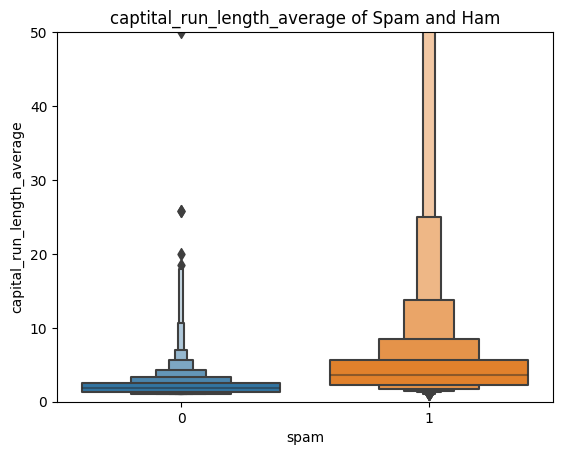

In [ ]:
# use boxenplot to show the difference of average words length in spam and ham
sns.boxenplot(x='spam',y='capital_run_length_average',data=df).set(title='captital_run_length_average of Spam and Ham')
plt.ylim(0,50)

- Check the longest words length of spam and ham

(0.0, 100.0)

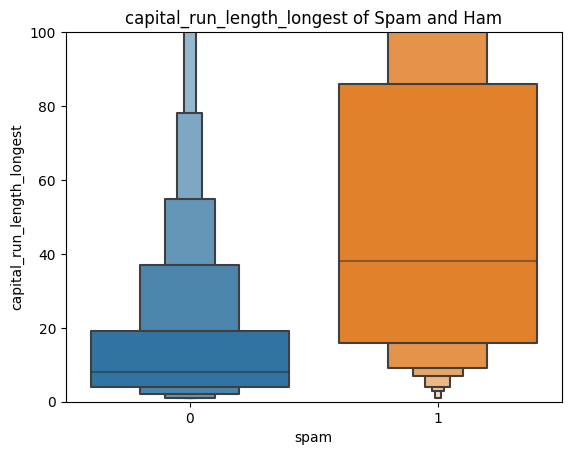

In [ ]:
sns.boxenplot(x='spam',y='capital_run_length_longest',data=df).set(title='capital_run_length_longest of Spam and Ham')
plt.ylim(0,100)

(0.0, 4000.0)

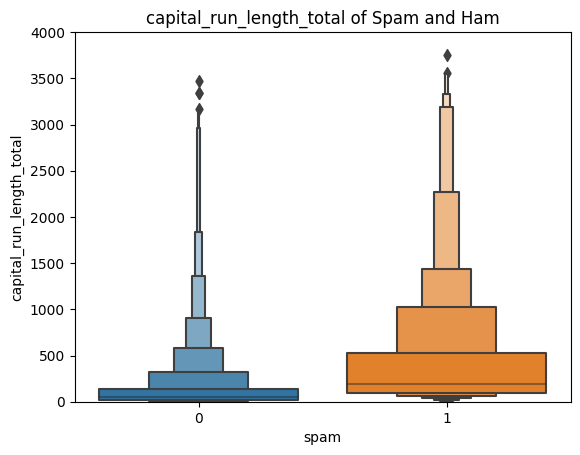

In [ ]:
sns.boxenplot(x='spam',y='capital_run_length_total',data=df).set(title='capital_run_length_total of Spam and Ham')
plt.ylim(0,4000)

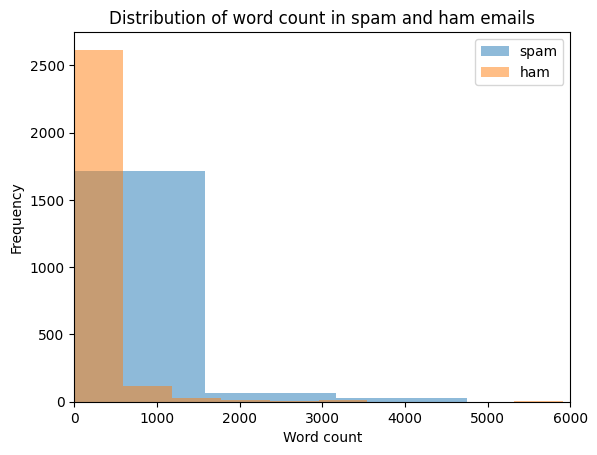

In [ ]:
plt.hist(spam_df['capital_run_length_total'], alpha=0.5, label='spam')
plt.hist(ham_df['capital_run_length_total'], alpha=0.5, label='ham')
plt.legend(loc='upper right')
plt.xlabel('Word count')
plt.ylabel('Frequency')
plt.title('Distribution of word count in spam and ham emails')
plt.xlim(0,6000)
plt.show()

### Target Value Analysis

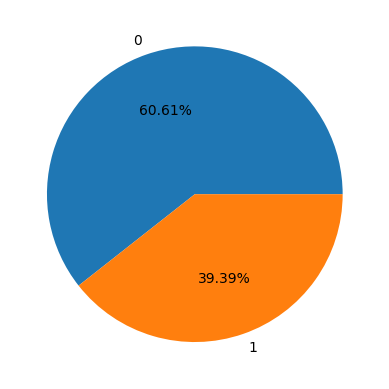

In [ ]:
plt.pie(df['spam'].value_counts(), labels=df['spam'].value_counts().index.tolist(), autopct='%.2f%%')
plt.show()
# 0 is not spam, 1 is spam
# 60.61% is not spam, 39.39% is spam

# Data Cleaning

## Check the missing values

In [ ]:
df.isnull().any()
# result shows that there is no null value

word_freq_make                False
word_freq_address             False
word_freq_all                 False
word_freq_3d                  False
word_freq_our                 False
word_freq_over                False
word_freq_remove              False
word_freq_internet            False
word_freq_order               False
word_freq_mail                False
word_freq_receive             False
word_freq_will                False
word_freq_people              False
word_freq_report              False
word_freq_addresses           False
word_freq_free                False
word_freq_business            False
word_freq_email               False
word_freq_you                 False
word_freq_credit              False
word_freq_your                False
word_freq_font                False
word_freq_000                 False
word_freq_money               False
word_freq_hp                  False
word_freq_hpl                 False
word_freq_george              False
word_freq_650               

# Building the Model: Implementing MLPs with Keras

## Check the Correlation of all features

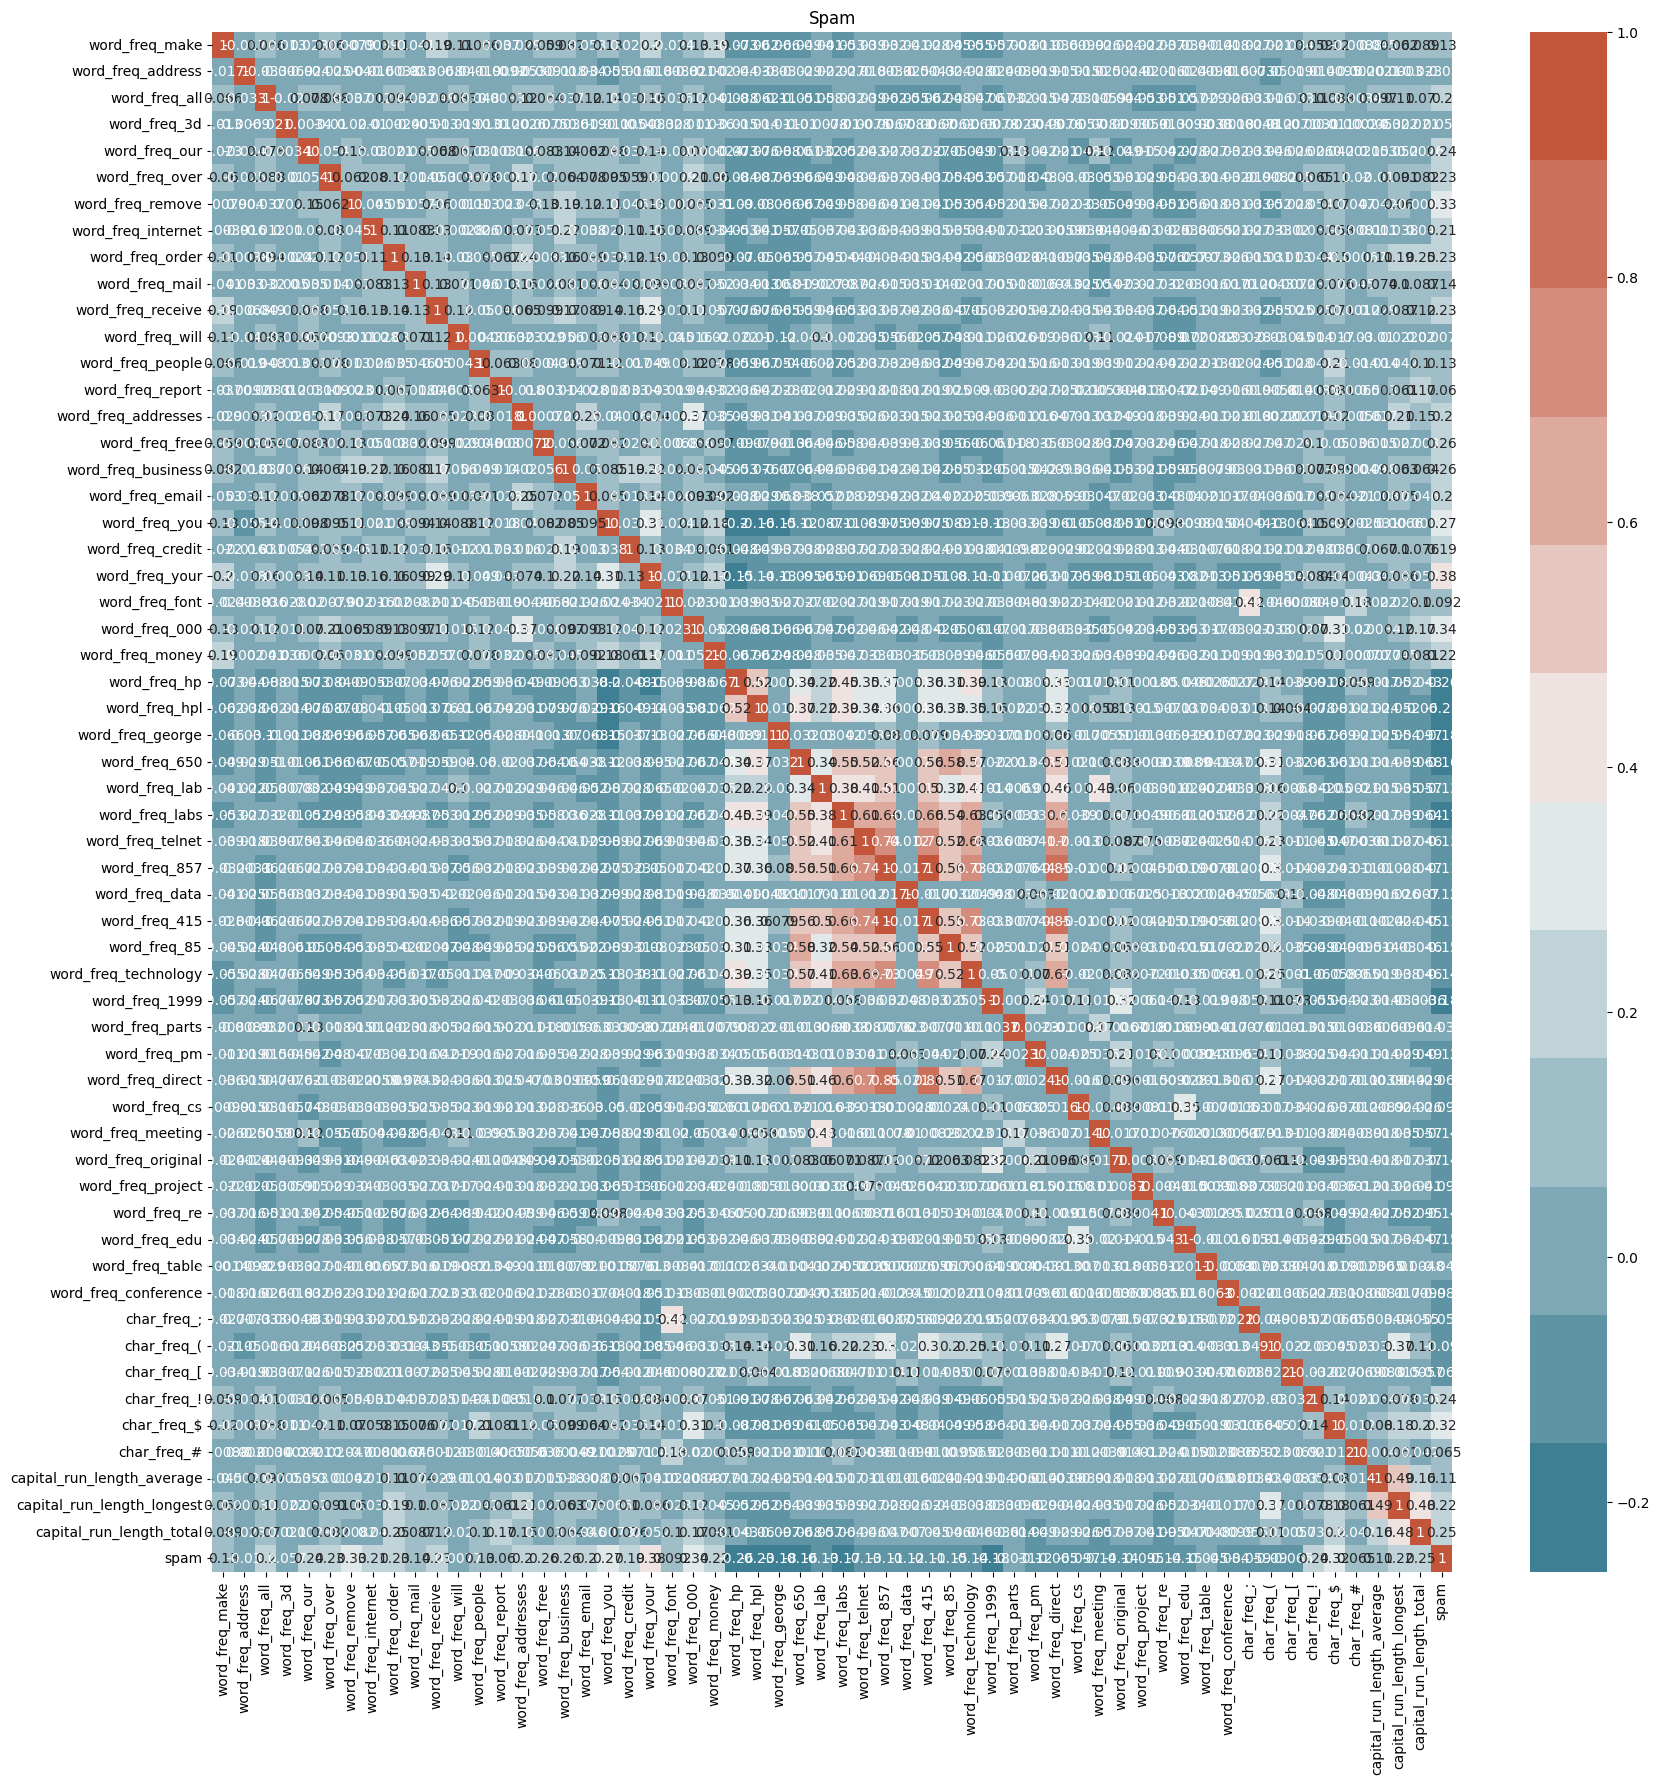

In [3]:
plt.figure(figsize=(20, 20))# define the figure size
df_corr = df.corr()# use the corr() method to calculate the correlations
sns.heatmap(df_corr, cmap=sns.diverging_palette(220, 20, n=12), annot=True)# use the heatmap method to draw
plt.title("Spam")
plt.show() 

In [4]:
l=list(df.columns)
l.pop()
l
for i in l:
    corr=df[[i,'spam']].corr()
    a=corr.iloc[1,0]
    if abs(a)<0.1:# set a benchmark of correlation score, to delete <0.1 attributes
        df=df.drop([i],axis=1)

In [5]:
df.shape

(4600, 43)

## Split the Train and Test Dataset

The dataset consists of 4,600 of labelled instances, in .csv format. The dataset is already randomized and the first 3,600 samples are for training, and the remaining 1,000 samples are for testing.

In [6]:
#split into training and testing data
train_data=df[:3600]
test_data=df[3600:]
# Preprocess the data
X_train_full=train_data.iloc[:,:-1].values
y_train_full = train_data.iloc[:, -1].values
X_train,y_train=X_train_full[:-600],y_train_full[:-600]
X_valid,y_valid=X_train_full[-600:],y_train_full[-600:] # to split the validation data
X_test = test_data.iloc[:, :-1].values
y_test = test_data.iloc[:, -1].values

In [7]:
X_train.shape

(3000, 42)

In [8]:
X_valid.shape

(600, 42)

## Scale the data

In [9]:
from sklearn.preprocessing import StandardScaler
# Scale the numerical columns
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_valid=scaler.fit_transform(X_valid)
X_test=scaler.transform(X_test)

## Create the model using the Sequential API without Fine-tune parameters


In [10]:
# Build the model
tf.random.set_seed(42)
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.InputLayer(input_shape=(42, )))# change the input shape into 42 because of the feature selection
model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(300, activation="relu"))# the first hidden layer, using relu activation function
model1.add(tf.keras.layers.Dense(100, activation="relu"))# the second hidden layer,using relu activation function
model1.add(tf.keras.layers.Dense(10, activation="softmax"))# the output layer, using softmax activation function

In [11]:
model1.compile(loss="sparse_categorical_crossentropy", # because the output is binary classfication, use the sparse_categorical_crossentropy
              optimizer="sgd",# use the sgd first
              metrics=["accuracy"])# use the "accuracy" as the metrics

In [12]:
history = model1.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
94/94 [==============================] - 2s 13ms/step - loss: 1.1175 - accuracy: 0.7843 - val_loss: 0.5399 - val_accuracy: 0.8883
Epoch 2/30
94/94 [==============================] - 1s 10ms/step - loss: 0.4453 - accuracy: 0.8813 - val_loss: 0.3381 - val_accuracy: 0.9050
Epoch 3/30
94/94 [==============================] - 1s 13ms/step - loss: 0.3275 - accuracy: 0.8993 - val_loss: 0.2880 - val_accuracy: 0.9150
Epoch 4/30
94/94 [==============================] - 1s 10ms/step - loss: 0.2845 - accuracy: 0.9103 - val_loss: 0.2642 - val_accuracy: 0.9200
Epoch 5/30
94/94 [==============================] - 1s 13ms/step - loss: 0.2595 - accuracy: 0.9197 - val_loss: 0.2498 - val_accuracy: 0.9183
Epoch 6/30
94/94 [==============================] - 1s 7ms/step - loss: 0.2420 - accuracy: 0.9220 - val_loss: 0.2379 - val_accuracy: 0.9233
Epoch 7/30
94/94 [==============================] - 1s 6ms/step - loss: 0.2298 - accuracy: 0.9250 - val_loss: 0.2302 - val_accuracy: 0.9233
Epoch 8/30
94/9

In [13]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 94}

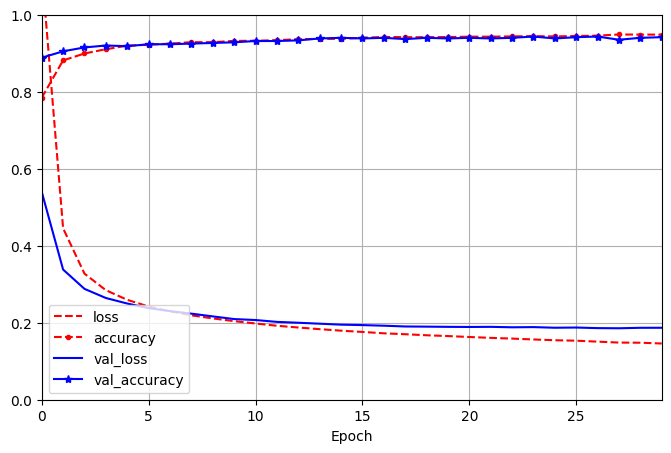

In [14]:
pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")  # extra code
plt.show()

In [15]:
model1.evaluate(X_test, y_test)

32/32 [==============================] - 0s 3ms/step - loss: 0.2227 - accuracy: 0.9200


[0.22274565696716309, 0.9200000166893005]

# Fine-Tuning Neural Network Hyperparameters

In [16]:
!pip install keras_tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 5.5 MB/s eta 0:00:00


In [17]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)
import keras_tuner as kt

def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
                  metrics=["accuracy"])
    return model

In [18]:
random_search_tuner = kt.RandomSearch(
    build_model, objective="val_accuracy", max_trials=5, overwrite=True,
    directory="spam", project_name="my_rnd_search", seed=42)
random_search_tuner.search(X_train, y_train, epochs=10,
                           validation_data=(X_valid, y_valid))

Trial 5 Complete [00h 00m 07s]
val_accuracy: 0.6266666650772095

Best val_accuracy So Far: 0.9449999928474426
Total elapsed time: 00h 00m 56s


In [19]:
top3_models = random_search_tuner.get_best_models(num_models=3)
best_model = top3_models[0]

In [20]:
top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
top3_params[0].values  # best hyperparameter values

{'n_hidden': 4,
 'n_neurons': 74,
 'learning_rate': 0.00905127409782462,
 'optimizer': 'adam'}

In [21]:
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial 2 summary
Hyperparameters:
n_hidden: 4
n_neurons: 74
learning_rate: 0.00905127409782462
optimizer: adam
Score: 0.9449999928474426


In [22]:
best_trial.metrics.get_last_value("val_accuracy")

0.9449999928474426

# Build New Model after Fine-tunig Parameters

In [23]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [24]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(42, )))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [25]:
history = model.fit(X_train, y_train, epochs=74,
                    validation_data=(X_valid, y_valid))

Epoch 1/74
94/94 [==============================] - 2s 12ms/step - loss: 0.3907 - accuracy: 0.8850 - val_loss: 0.1878 - val_accuracy: 0.9400
Epoch 2/74
94/94 [==============================] - 1s 9ms/step - loss: 0.1967 - accuracy: 0.9363 - val_loss: 0.1843 - val_accuracy: 0.9417
Epoch 3/74
94/94 [==============================] - 1s 9ms/step - loss: 0.1678 - accuracy: 0.9410 - val_loss: 0.1986 - val_accuracy: 0.9433
Epoch 4/74
94/94 [==============================] - 1s 9ms/step - loss: 0.1544 - accuracy: 0.9497 - val_loss: 0.1927 - val_accuracy: 0.9417
Epoch 5/74
94/94 [==============================] - 1s 10ms/step - loss: 0.1288 - accuracy: 0.9553 - val_loss: 0.1778 - val_accuracy: 0.9417
Epoch 6/74
94/94 [==============================] - 1s 9ms/step - loss: 0.1248 - accuracy: 0.9543 - val_loss: 0.1841 - val_accuracy: 0.9483
Epoch 7/74
94/94 [==============================] - 1s 9ms/step - loss: 0.1083 - accuracy: 0.9610 - val_loss: 0.2628 - val_accuracy: 0.9383
Epoch 8/74
94/94 [

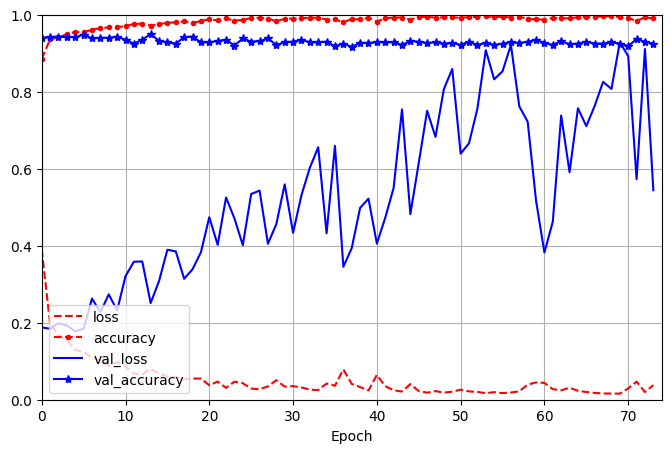

In [26]:
pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 74], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")  # extra code
plt.show()

In [27]:
model.evaluate(X_test, y_test)

32/32 [==============================] - 0s 4ms/step - loss: 0.5773 - accuracy: 0.9290


[0.5773285031318665, 0.9290000200271606]

In [28]:
# Find the epoch with the best validation accuracy
best_epoch = history.history['val_accuracy'].index(max(history.history['val_accuracy'])) + 1
best_val_accuracy = max(history.history['val_accuracy'])

print(f"Best validation accuracy of {best_val_accuracy:.4f} achieved at epoch {best_epoch}.")

Best validation accuracy of 0.9500 achieved at epoch 14.


# Calculating Confusion Matrix

In [29]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Make predictions on the test set
y_pred = model.predict(X_test)
# Convert the predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_labels)
# Print the confusion matrix
print(cm)



32/32 [==============================] - 0s 2ms/step
[[583  19]
 [ 52 346]]


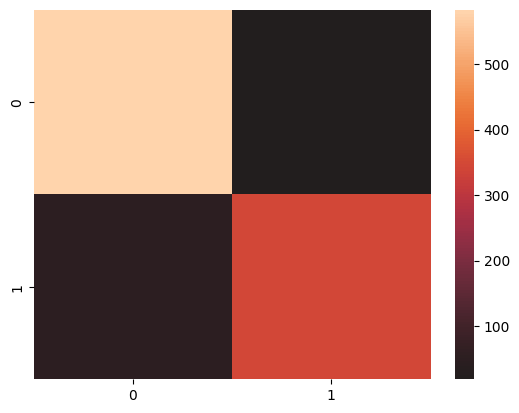

In [30]:
sns.heatmap(cm, center = True)
plt.show()

# Other ML classification Comparison

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Initialize the models
# define the random_state=42
models = [
    LogisticRegression(random_state=42),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    SGDClassifier(random_state=42),
    SVC(random_state=42),
    KNeighborsClassifier()
]

# Train and evaluate the models
for model in models:
    # Train the model
    model.fit(X_train, y_train)
    model_scores=model.score(X_test,y_test)
    # Print the model's mean cross_val_score
    print(f'{model.__class__.__name__}: {model_scores.mean():.3f}')


LogisticRegression: 0.917
DecisionTreeClassifier: 0.860
RandomForestClassifier: 0.936
SGDClassifier: 0.913
SVC: 0.907
KNeighborsClassifier: 0.897


In [32]:
randommodel=RandomForestClassifier(random_state=42)
randommodel.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Confusion Matrix is : 
 [[592  10]
 [ 54 344]]


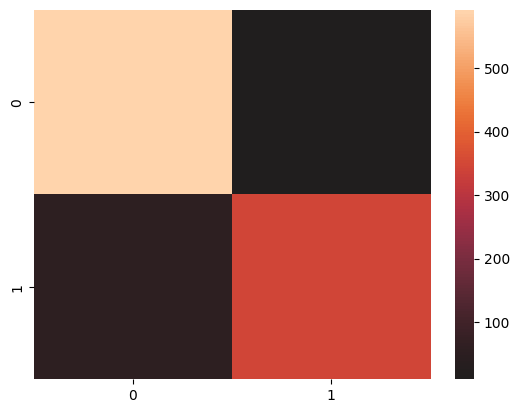

In [33]:
CM = confusion_matrix(y_test,randommodel.predict(X_test))
print('Confusion Matrix is : \n', CM)
sns.heatmap(CM, center = True)
plt.show()